Thực hiện chiến lược DFF, sử dụng mô hình DFF.h5

Thực hiện get data thị trường chứng khoán việt nam

In [132]:
from api import get_stock_data
from api import get_stock_data
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import numpy as np
import talib as ta
import pandas as pd

startdate = '2014-01-01'
enddate = '2024-12-05'

data = get_stock_data('MSN', startdate, enddate, 'VND')

2024-05-16 11:03:25,447 : INFO : data MSN from 2014-01-01 to 2024-12-05 have already cloned!


Thực hiện tính các indicator cần thiết

In [133]:
# Tải mô hình đã được lưu trước
model = load_model('dff_v1.h5')

# Tính toán các chỉ số kỹ thuật (EMA, AU, AD)
data['EMA'] = data['close'].ewm(span=20, adjust=False).mean()
delta = data['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
data['AU'] = gain.rolling(window=14, min_periods=1).mean()
data['AD'] = loss.rolling(window=14, min_periods=1).mean()

2024-05-16 11:03:25,581 : WARNING : Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


Thực hiện thêm mô hình

In [134]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
features = ['EMA', 'AU', 'AD']
X = scaler.fit_transform(data[features])

# Dự đoán trạng thái thị trường
predicted_classes = np.argmax(model.predict(X), axis=1)

# Chuyển đổi trạng thái thị trường thành các label tương ứng
market_states = ['Downtrend', 'Uptrend', 'Sideway']
predicted_labels = [market_states[i] for i in predicted_classes]

data['Market_State'] = predicted_labels

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Kiểm  tra thử trạng thái thị trường

In [135]:
for i, (index, row) in enumerate(data.iterrows()):
    # In ra trạng thái thị trường và ngày tương ứng
    print(f"Date: {index}, Market State: {predicted_labels[i]}")

Date: 2014-01-02 00:00:00, Market State: Uptrend
Date: 2014-01-03 00:00:00, Market State: Downtrend
Date: 2014-01-06 00:00:00, Market State: Uptrend
Date: 2014-01-07 00:00:00, Market State: Uptrend
Date: 2014-01-08 00:00:00, Market State: Uptrend
Date: 2014-01-09 00:00:00, Market State: Uptrend
Date: 2014-01-10 00:00:00, Market State: Uptrend
Date: 2014-01-13 00:00:00, Market State: Uptrend
Date: 2014-01-14 00:00:00, Market State: Uptrend
Date: 2014-01-15 00:00:00, Market State: Uptrend
Date: 2014-01-16 00:00:00, Market State: Uptrend
Date: 2014-01-17 00:00:00, Market State: Uptrend
Date: 2014-01-20 00:00:00, Market State: Uptrend
Date: 2014-01-21 00:00:00, Market State: Uptrend
Date: 2014-01-22 00:00:00, Market State: Uptrend
Date: 2014-01-23 00:00:00, Market State: Uptrend
Date: 2014-01-24 00:00:00, Market State: Uptrend
Date: 2014-01-27 00:00:00, Market State: Uptrend
Date: 2014-02-06 00:00:00, Market State: Uptrend
Date: 2014-02-07 00:00:00, Market State: Uptrend
Date: 2014-02-10 0

Thực hiện kiểm tra điều kiện vào lệnh, tính toán các indicator thêm:

In [136]:
#Tính toán thêm các indicator khác:
data['RSI'] = ta.RSI(data['close'], timeperiod=14)
data['ERSI'] = ta.EMA(data['RSI'], timeperiod=14)

data.dropna()

Attributes,Symbols,high,low,open,close,avg,volume,EMA,AU,AD,Market_State,RSI,ERSI
date,,,,,,,,,,,,,
2014-02-19,MSN,94.0,92.5,92.5,94.0,93.210000,328980.0,91.728981,0.678571,0.857143,Downtrend,63.162977,65.010513
2014-02-20,MSN,95.5,93.0,94.0,94.5,94.540000,455000.0,91.992888,0.714286,0.571429,Uptrend,64.138858,64.894293
2014-02-21,MSN,96.0,94.0,94.0,95.0,94.980000,287340.0,92.279280,0.642857,0.571429,Uptrend,65.133587,64.926198
2014-02-24,MSN,96.5,94.0,94.0,96.5,96.110000,282900.0,92.681253,0.535714,0.571429,Uptrend,68.001196,65.336198
2014-02-25,MSN,102.0,96.5,96.5,100.0,99.380000,830970.0,93.378276,0.785714,0.428571,Uptrend,73.481694,66.422264
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-10,MSN,71.9,70.6,71.4,70.8,71.124000,3814800.0,70.195140,0.685714,0.350000,Uptrend,51.163739,47.289908
2024-05-13,MSN,71.7,70.3,70.9,70.8,70.862000,3182500.0,70.252745,0.635714,0.350000,Uptrend,51.163739,47.806419
2024-05-14,MSN,71.4,70.1,71.0,70.6,70.684000,3692100.0,70.285817,0.635714,0.342857,Uptrend,50.399263,48.152131


In [137]:
# Đặt lại tên chỉ mục
data.index.name = 'Date'

# Chuyển đổi chỉ mục từ text sang datetime
data.index = pd.to_datetime(data.index, format='%Y-%m-%d')

# Lấy năm và tháng hiện tại
current_year = pd.Timestamp.now().year
current_month = pd.Timestamp.now().month

# Lọc dữ liệu của tháng hiện tại
data_current_month = data[(data.index.year == current_year) & (data.index.month == current_month)]

# Loại bỏ các dòng có giá trị NaN
data_current_month = data_current_month.dropna()

# In toàn bộ dữ liệu của tháng hiện tại
print(data_current_month)

Attributes Symbols  high   low  open  close        avg     volume        EMA  \
Date                                                                           
2024-05-02     MSN  68.0  67.1  67.8   68.0  67.609000  2279400.0  69.408803   
2024-05-03     MSN  70.9  68.1  68.6   69.8  69.841000  7793300.0  69.446060   
2024-05-06     MSN  71.3  70.1  70.7   71.1  70.766000  8071800.0  69.603578   
2024-05-07     MSN  71.5  70.5  71.4   71.2  70.944000  4501000.0  69.755618   
2024-05-08     MSN  73.2  70.2  70.9   72.3  71.954000  6123100.0  69.997941   
2024-05-09     MSN  73.8  70.6  72.1   71.4  72.173000  8411500.0  70.131470   
2024-05-10     MSN  71.9  70.6  71.4   70.8  71.124000  3814800.0  70.195140   
2024-05-13     MSN  71.7  70.3  70.9   70.8  70.862000  3182500.0  70.252745   
2024-05-14     MSN  71.4  70.1  71.0   70.6  70.684000  3692100.0  70.285817   
2024-05-15     MSN  73.3  71.9  72.0   72.2  72.494000  7168800.0  70.468120   
2024-05-16     MSN  73.0  72.5  72.9   7

Thực hiện kiểm tra điều kiện hiện tại:

In [138]:
# print(data.last)

last_row = data.iloc[-1]
if(
    (last_row['RSI'] > last_row['ERSI'])
    and (last_row['Market_State'] == 'Uptrend')
    and (last_row['ERSI'] > 40 or last_row['ERSI'] < 60)
):
    print('buy')
else: print('Not buy this time')
last_row

buy


Attributes
Symbols               MSN
high                 73.0
low                  72.5
open                 72.9
close                72.5
avg             72.621429
volume          1949700.0
EMA             70.661633
AU               0.742857
AD               0.185714
Market_State      Uptrend
RSI             57.045315
ERSI            50.251238
Name: 2024-05-16 00:00:00, dtype: object

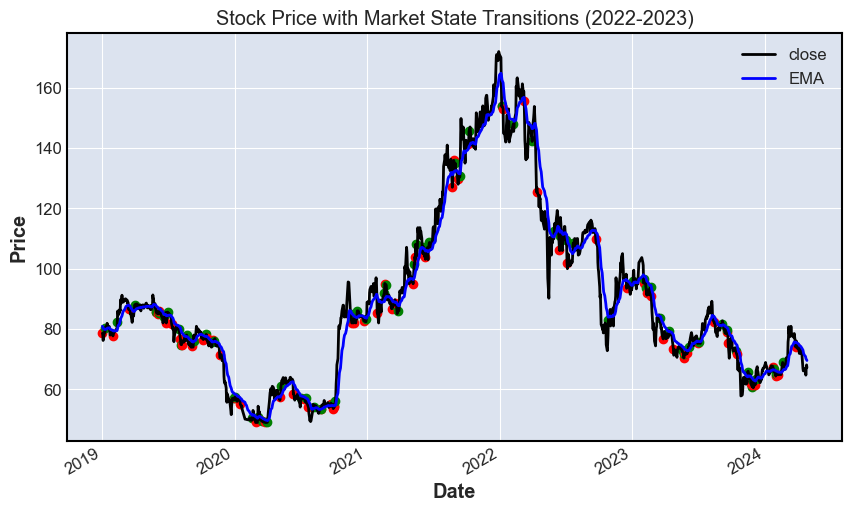

In [139]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Lọc dữ liệu từ năm 2022 đến 2023
filtered_data = data.loc['2019-01-01':'2024-05-01']

# Lấy giá trị của trạng thái thị trường
market_states = filtered_data['Market_State']

# Tạo một biến để lưu trữ trạng thái hiện tại của thị trường
current_market_state = None

# Lặp qua từng ngày và cập nhật trạng thái thị trường
for date, state in market_states.items():
    if state != current_market_state:
        current_market_state = state
        color = 'green' if state == 'Uptrend' else 'red'
        plt.scatter(date, filtered_data.loc[date, 'close'], color=color, marker='o')

# Vẽ biểu đồ nến
filtered_data['close'].plot(figsize=(10, 6), color='black')
filtered_data['EMA'].plot(figsize=(10, 6), color='blue')


# Đặt tiêu đề và nhãn trục
plt.title('Stock Price with Market State Transitions (2022-2023)')
plt.xlabel('Date')
plt.ylabel('Price')

# Hiển thị chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()